In [1]:
import torch 
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

/Users/zhuang/opt/anaconda3/envs/ds/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Prep data

In [6]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
### n_feature = 1 because there is only one x (not x1, x2, x3, ...)
### n_target = 1 by default because there is only one y

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1) # reshape

n_samples, n_features = X.shape

## Model

In [7]:
input_size = n_features # 1 input
output_size = 1 # 1 output

model = nn.Linear(input_size, output_size)

## Loss & Optimizer

In [11]:
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## training loop

epoch: 10, loss = 2498.9377
epoch: 20, loss = 1906.5425
epoch: 30, loss = 1476.9982
epoch: 40, loss = 1165.2534
epoch: 50, loss = 938.8127
epoch: 60, loss = 774.2072
epoch: 70, loss = 654.4663
epoch: 80, loss = 567.3047
epoch: 90, loss = 503.8203
epoch: 100, loss = 457.5561


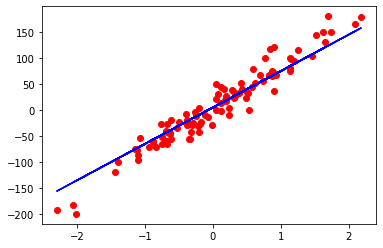

In [14]:
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass & loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # backward pass
    loss.backward()

    # update
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')

# plot
predicted = model(X).detach().numpy() # set requires_grad = False then convert to numpy
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()